<a href="https://colab.research.google.com/github/Luizaaaa/RedesNeurais/blob/main/HW5_Luiza_Stringhini_Linhares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import datetime
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.datasets import cifar10


In [ ]:
(X_train,Y_train) , (X_test,Y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
X_input = tf.keras.layers.Input((32,32,3))
X = tf.keras.layers.experimental.preprocessing.Resizing(224,224)(X_input)
base_model = tf.keras.applications.Xception(input_shape=(224,224,3), input_tensor=X, include_top = False, weights = 'imagenet', pooling='avg')

83697664/83683744 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 resizing (Resizing)            (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['resizing[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']    

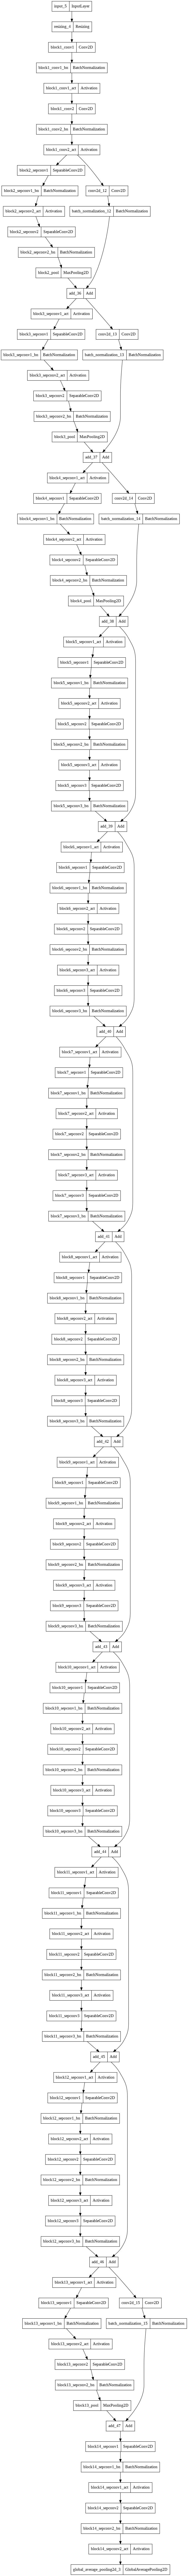

In [ ]:
tf.keras.utils.plot_model(base_model)

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 True
1 resizing True
2 block1_conv1 True
3 block1_conv1_bn True
4 block1_conv1_act True
5 block1_conv2 True
6 block1_conv2_bn True
7 block1_conv2_act True
8 block2_sepconv1 True
9 block2_sepconv1_bn True
10 block2_sepconv2_act True
11 block2_sepconv2 True
12 block2_sepconv2_bn True
13 conv2d True
14 block2_pool True
15 batch_normalization True
16 add True
17 block3_sepconv1_act True
18 block3_sepconv1 True
19 block3_sepconv1_bn True
20 block3_sepconv2_act True
21 block3_sepconv2 True
22 block3_sepconv2_bn True
23 conv2d_1 True
24 block3_pool True
25 batch_normalization_1 True
26 add_1 True
27 block4_sepconv1_act True
28 block4_sepconv1 True
29 block4_sepconv1_bn True
30 block4_sepconv2_act True
31 block4_sepconv2 True
32 block4_sepconv2_bn True
33 conv2d_2 True
34 block4_pool True
35 batch_normalization_2 True
36 add_2 True
37 block5_sepconv1_act True
38 block5_sepconv1 True
39 block5_sepconv1_bn True
40 block5_sepconv2_act True
41 block5_sepconv2 True
42 block5_sepconv2_bn T

In [ ]:
for i, layer in enumerate(base_model.layers):
  if i > 130:
    layer.trainable = True
    print(i, layer.name, layer.trainable)
  else:
    layer.trainable = False

131 block14_sepconv2_bn True
132 block14_sepconv2_act True
133 global_average_pooling2d True


In [ ]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 resizing (Resizing)            (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['resizing[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']    

In [ ]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(10, activation="softmax")
])


opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 21,388,594
Trainable params: 531,210
Non-trainable params: 20,857,384
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, batch_size=100, validation_split=0.1, epochs=10)

Epoch 1/10
  9/450 [..............................] - ETA: 2:08:26 - loss: 1.9204 - accuracy: 0.3433

KeyboardInterrupt: ignored

In [ ]:
test_loss, test_accuracy = model.evaluate(X_train, Y_train, batch_size=100)
test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=100)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()